# Data Science And Business Analytics Internship - The Sparks Foundation

## Task#3 Exploratory Data Analysis - Retail 
    Perform 'Exploratory Data Analysis' on dataset 'SampleSuperstore'
    Dataset: https://bit.ly/3i4rbWl
    Task submitted by: Syeda Manal

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")
import scipy.stats
%matplotlib inline

#### Importing Dataset

In [3]:
retail_df = pd.read_csv("SampleSuperstore.csv")
print('Data is loaded successfully')

Data is loaded successfully


#### Take a peek into the Data

In [4]:
retail_df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
retail_df.shape

(9994, 13)

We have **9994**  records/rows with **13** features/columns

In [6]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
retail_df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


#### check number of unique values in each categorical column

In [8]:
cat_col = [col for col in retail_df.columns if retail_df[col].dtypes == 'object']

# using nunique then passing the series into a new datafame.
df_unique = retail_df[cat_col].nunique().to_frame().reset_index()
# setting column names.
df_unique.columns = ['Feature','No. of Unique Values']
df_unique

,Feature,No. of Unique Values
0,Ship Mode,4
1,Segment,3
2,Country,1
3,City,531
4,State,49
5,Region,4
6,Category,3
7,Sub-Category,17


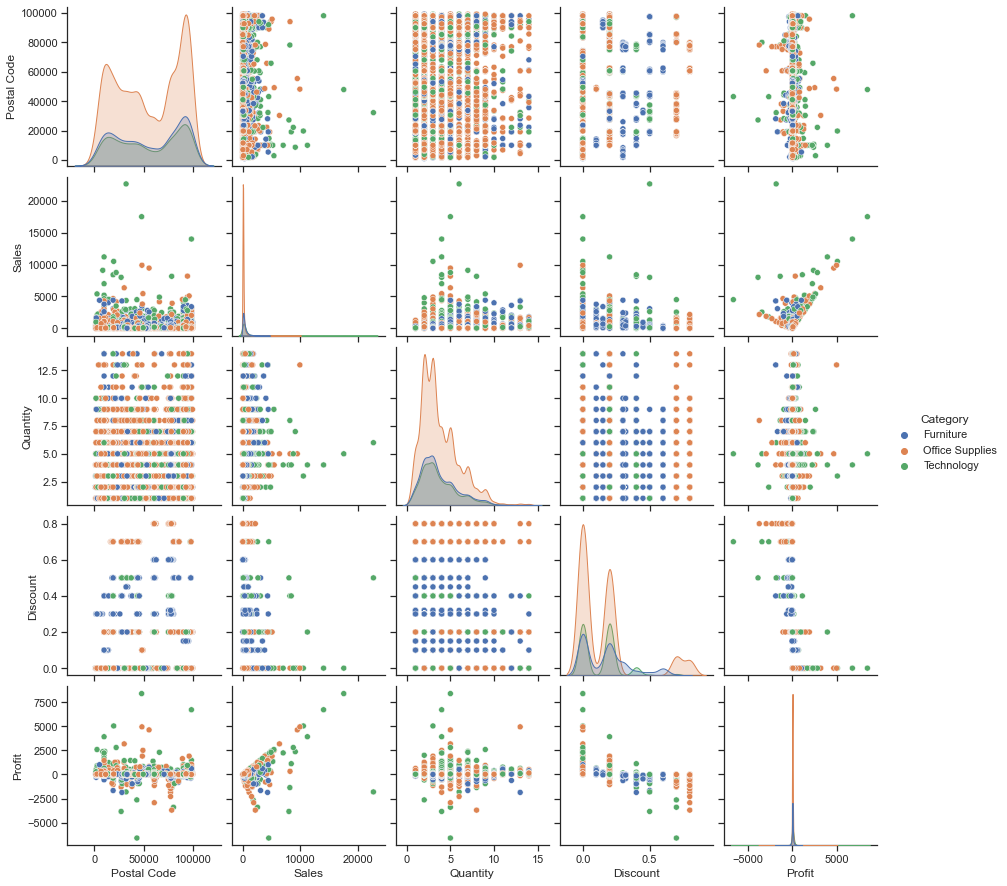

In [30]:
sns.pairplot(retail_df, hue = 'Category')

### See Relationship of profit with numerical features
Lets plot correlation matrix to see correlation between numerical features

In [10]:
corr = retail_df.corr()
corr.style.background_gradient(cmap = 'coolwarm').set_precision(2)

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.00,-0.02,0.01,0.06,-0.03
Sales,-0.02,1.00,0.20,-0.03,0.48
Quantity,0.01,0.20,1.00,0.01,0.07
Discount,0.06,-0.03,0.01,1.00,-0.22
Profit,-0.03,0.48,0.07,-0.22,1.00


Observations:
1. Profit and sales have low correlation
2. Profit and Quantity has a very high correlation
3. Profite and Discount are negatively correlated

### Create a histogram with the 10 Cities that have the most 'Quantity' ordered

Text(0.5, 0, 'Cities')

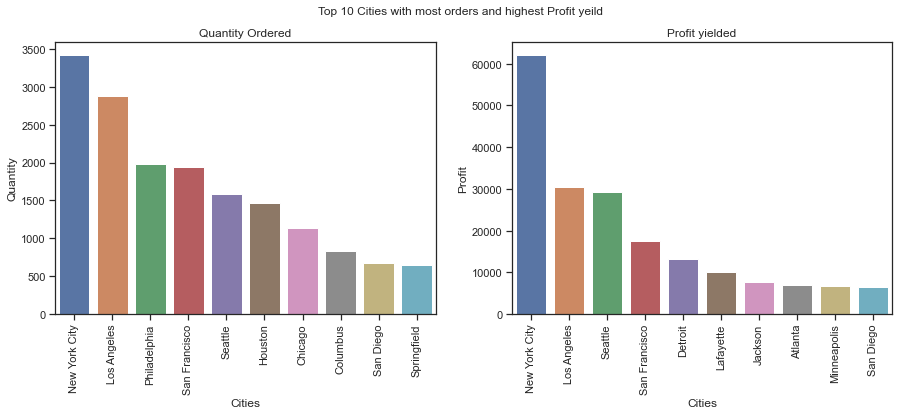

In [11]:
Cities = retail_df.groupby('City').sum()
Cities_qty = Cities.sort_values(by = 'Quantity', ascending = False)[0:10]
Cities_pr = Cities.sort_values(by = 'Profit', ascending = False)[0:10]

# Cities['Quantity'].plot(kind = "bar")

fig , ax = plt.subplots(1,2, figsize = (15,5))
fig.suptitle('Top 10 Cities with most orders and highest Profit yeild')
ax[0].set_title("Quantity Ordered")
sns.barplot(x= Cities_qty.index, y=Cities_qty["Quantity"], ax = ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)
ax[0].set_xlabel("Cities")


ax[1].set_title("Profit yielded")
sns.barplot(x= Cities_pr.index, y=Cities_pr["Profit"], ax = ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)
ax[1].set_xlabel("Cities")


Observation:

**New York City** is the one with most quantity ordered and yeilded highest profit. Second is **Los Angeles**.
But there is something weired going on here. **Philadelphia** is the third highest acording to quantity ordered but its not even in the top ten according to profit yield. <br>
There are some cities with negative profit i.e. **loss**.
#### Lets check cities with negative profit or loss

In [12]:
Cities[Cities['Profit'] < 0].sort_values(by = "Profit")

,Postal Code,Sales,Quantity,Discount,Profit
City,,,,,
Philadelphia,10275302,109077.0130,1981,175.50,-13837.7674
Houston,29052387,64504.7604,1466,143.14,-10153.5485
San Antonio,4614213,21843.5280,247,22.60,-7299.0502
Lancaster,1980720,9891.4640,171,14.50,-7239.0684
Chicago,19037248,48539.5410,1132,120.50,-6654.5688
...,...,...,...,...,...
Ormond Beach,32174,2.8080,3,0.70,-1.9656
Pensacola,32503,2.2140,3,0.70,-1.4760
Elyria,44035,1.8240,1,0.70,-1.3984


Observation:
There are 116 Cities with negative profit i.e. loss
Philadelphia has maximum loss

### Lets check cities in Loss in detail and compare them with cities with higher profit

In [13]:
Cities_los = Cities.sort_values(by = 'Profit')[0:10]
Cities_los


,Postal Code,Sales,Quantity,Discount,Profit
City,,,,,
Philadelphia,10275302,109077.0130,1981,175.50,-13837.7674
Houston,29052387,64504.7604,1466,143.14,-10153.5485
San Antonio,4614213,21843.5280,247,22.60,-7299.0502
Lancaster,1980720,9891.4640,171,14.50,-7239.0684
Chicago,19037248,48539.5410,1132,120.50,-6654.5688
Burlington,516678,21668.0820,105,3.40,-3622.8772
Dallas,11802703,20131.9322,555,56.30,-2846.5257
Phoenix,5356449,11000.2570,224,22.30,-2790.8832
Aurora,4777612,11656.4780,258,24.00,-2691.7386


In [14]:
cities_in_loss = retail_df[retail_df['City'].isin(Cities_los.index)]
cities_in_profit = retail_df[retail_df['City'].isin(Cities_pr.index)]


Text(0.5, 1.0, 'Loss')

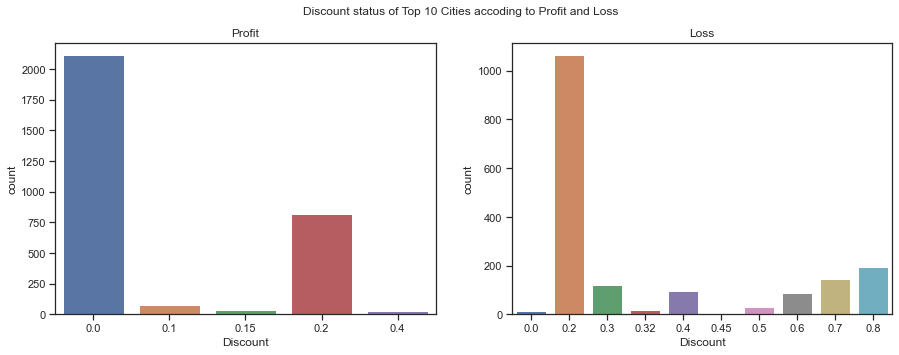

In [15]:
fig , ax = plt.subplots(1,2, figsize = (15,5))
fig.suptitle('Discount status of Top 10 Cities accoding to Profit and Loss')


sns.countplot(x = cities_in_profit['Discount'], ax = ax[0])
ax[0].set_title("Profit")
sns.countplot(x= cities_in_loss['Discount'], ax = ax[1])
ax[1].set_title("Loss")



Text(0, 0.5, 'Discounts')

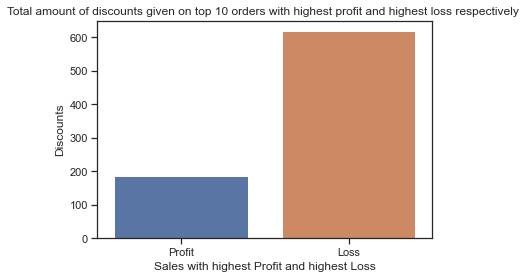

In [16]:
discount = []
discount.append(cities_in_profit['Discount'].sum())
discount.append(cities_in_loss['Discount'].sum())
# Create a Dataframe with sum of discounts given on top 10 orders that resulted in profit or loss 
data = {'Name': ['Profit', 'Loss'], 'Count': discount}
disc_df = pd.DataFrame(data)

#Plot sum of discounts 
sns.barplot(x = disc_df.Name, y = disc_df.Count)
plt.title("Total amount of discounts given on top 10 orders with highest profit and highest loss respectively ")
plt.xlabel('Sales with highest Profit and highest Loss')
plt.ylabel('Discounts')

Observation:

Orders with **highest profit** was given **least discounts**. <br>
hence to increase profit we must limit discounts.

### Lets explore sub-Categories with high profit and high loss

In [17]:
#lets change the names to gain some clarity
loss_orders = cities_in_loss
profit_orders = cities_in_profit

# top 10 Categories that yielded highest profit
profit_orders= profit_orders.sort_values(by = 'Profit', ascending = False)[0:10]
# top 10 Categories with highest loss
loss_orders = loss_orders.sort_values(by = 'Profit')[0:10]


Text(0, 0.5, 'Loss')

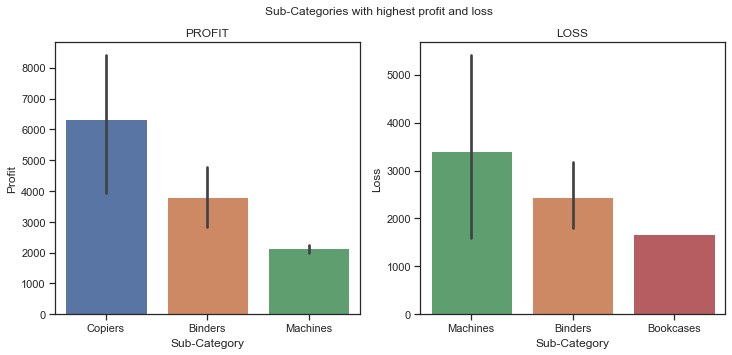

In [18]:
fig, ax = plt.subplots(1, 2, figsize= (12, 5))
palette ={"Copiers": "C0", "Binders": "C1", "Machines": "C2", "Bookcases": "C3"}

fig.suptitle("Sub-Categories with highest profit and loss")
sns.barplot(x = profit_orders['Sub-Category'], y = profit_orders['Profit'], ax = ax[0],
            palette=palette)
ax[0].set_title('PROFIT')
sns.barplot(x = loss_orders['Sub-Category'], y = loss_orders['Profit'].abs(), ax = ax[1],
            palette=palette)
ax[1].set_title('LOSS')
ax[1].set_ylabel('Loss')



Observation:<br>
**Copiers** yeilded highest profit. <br>
**Machines** are high in loss

### Lets explore Segments with high profit and high loss

Text(0.5, 1.0, 'LOSS')

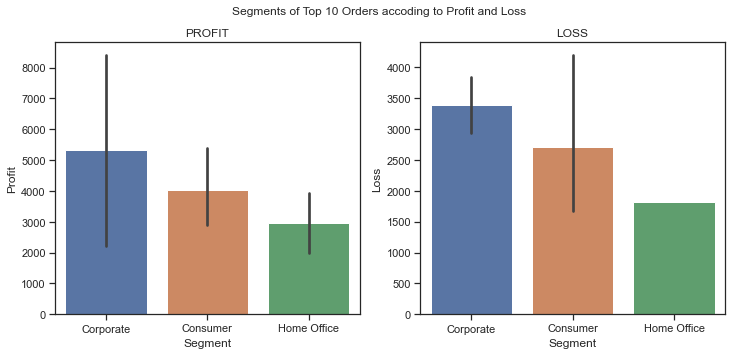

In [19]:
fig, ax = plt.subplots(1, 2, figsize= (12, 5))
fig.suptitle('Segments of Top 10 Orders accoding to Profit and Loss')

# palette ={"Copiers": "C0", "Binders": "C1", "Machines": "C2", "Bookcases": "C3"}
order = ['Corporate', 'Consumer', 'Home Office']
sns.barplot(x = profit_orders['Segment'], y = profit_orders['Profit'], ax = ax[0], order = order)
ax[0].set_title('PROFIT')
sns.barplot(x = loss_orders['Segment'], y = loss_orders['Profit'].abs(), ax = ax[1], order= order)
ax[1].set_ylabel('Loss')
ax[1].set_title('LOSS')


# sns.barplot(x = loss_orders['Category'], y = loss_orders['Profit'].abs(), hue = loss_orders['Ship Mode'], ax = ax[1],
#             palette=palette, )

**Corporate segment** is highest both in profit and loss. **Consumer** is second and **Home Office** is third in both profit and loss. <br>
Above graphs doesnot show any meaningful information. To clear the situation, lets plot average profit

In [20]:
segment = retail_df.groupby('Segment')["Profit"].sum()
segment

Segment
Consumer       134119.2092
Corporate       91979.1340
Home Office     60298.6785
Name: Profit, dtype: float64

Observation: <br>
    Average Profit is highest for **Consumer** segment and lowest for **Home Office**


### Lets explore Ship Mode for high profit and high loss


Text(0, 0.5, 'Loss')

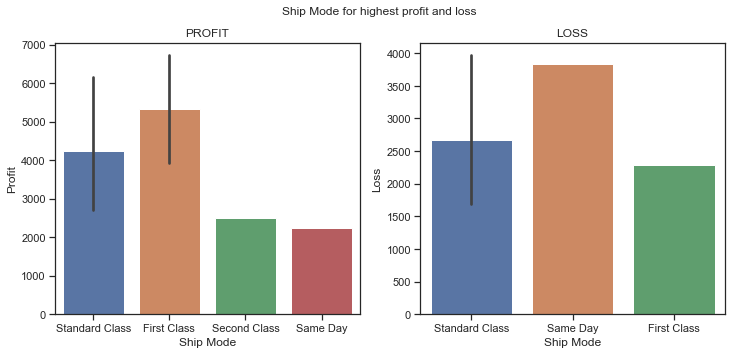

In [21]:
fig, ax = plt.subplots(1, 2, figsize= (12, 5))
# palette ={"Copiers": "C0", "Binders": "C1", "Machines": "C2", "Bookcases": "C3"}

fig.suptitle("Ship Mode for highest profit and loss")
sns.barplot(x = profit_orders['Ship Mode'], y = profit_orders['Profit'], ax = ax[0],
            )
ax[0].set_title('PROFIT')
sns.barplot(x = loss_orders['Ship Mode'], y = loss_orders['Profit'].abs(), ax = ax[1],
            )
ax[1].set_title('LOSS')
ax[1].set_ylabel('Loss')



Observation:<br>
    Profit is maximum in **First Class**<br>
    Loss is maximum in **Standard Class** shipping
    

### Sales to Profit ratio of sub categories

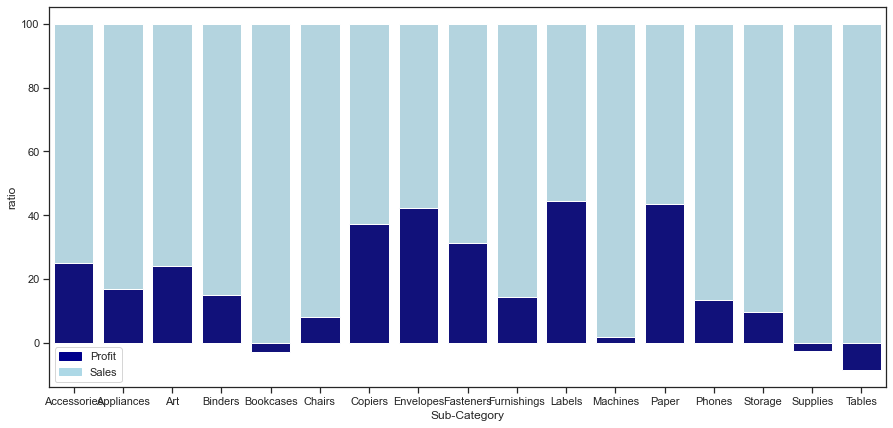

In [68]:
import matplotlib.patches as mpatches

sale_profit_ratio = retail_df.groupby('Sub-Category')[['Profit', 'Sales']].sum()

plt.figure(figsize = (15, 7))

sale_profit_ratio['ratio'] = [i / j * 100 for i,j in zip(sale_profit_ratio['Profit'], sale_profit_ratio['Sales'])]
sale_profit_ratio['total'] = [i / j * 100 for i,j in zip(sale_profit_ratio['Sales'], sale_profit_ratio['Sales'])]

sale_profit_ratio
sns.barplot(x = sale_profit_ratio.index, y = sale_profit_ratio['total'], color = 'lightblue')

sns.barplot(x = sale_profit_ratio.index, y = sale_profit_ratio['ratio'], color = 'darkblue')


# add legend
top_bar = mpatches.Patch(color='darkblue', label='Profit')
bottom_bar = mpatches.Patch(color='lightblue', label='Sales')
plt.legend(handles=[top_bar, bottom_bar])



Observations:<br>
Sale to profit ratio is high for following sub-Categories:<br>
**Copiers, Envelops, Fasteners, Lables and Papers**<br>
So we should produce more of above items to increase profit<br>
similarly, Profit is negative i.e. loss for following sub-categories:<br>
**Bookcases, Supplies and Tables**<br>
We should work on these items minimize the loss

#### Conclusion: <br>
Correlations:
- Profit and sales have low correlation
- Profit and Quantity has a very high correlation
- Profite and Discount are negatively correlated

Cities: <br>
- Profit is maximum in **New York City**. <br>
- Loss is maximum in **Philadelphia**. <br>

Discount:<br>
- Profit is maximum with orders that are given **Least Discounts**. <br>
- Loss is maximum with orders taht are given **highest Discounts**. <br>

Sub-Categories:
- **Copiers** yeilded highest profit. <br>
- **Machines** are high in loss. <br>

Segment:<br>
- Average Profit is highest for **Consumer** segment. <br>
- Average Profit is lowest for **Home Office**. <br>

Ship Mode:<br>
- Profit is maximum in **First Class**. <br>
- Loss is maximum in **Standard Class** shipping. 
    

Sale to Profit Ratio:<br>
- **Copiers, Envelops, Fasteners, Lables and Papers** high ratio<br>
- Should produce more of above items<br>
- **Bookcases, Supplies and Tables** low ratio<br>
- Should work on above items to minimize loss

